In [1]:
import os
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path = "/content/drive/MyDrive/Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv("all_data_copy.csv", index=False)
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv("all_data_copy.csv", index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
all_data = all_months_data
all_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [7]:
all_data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(186850, 6)

In [8]:
all_data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

 **I have to convert data types for price, Quantity to numeric values and Order date to date or datetime. It will be done later on in this report**

In [9]:
all_data.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
all_data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

#### Drop rows of NAN

In [11]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
print(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     Order ID Product Quantity Ordered Price Each Order Date Purchase Address
339       NaN     NaN              NaN        NaN        NaN              NaN
630       NaN     NaN              NaN        NaN        NaN              NaN
735       NaN     NaN              NaN        NaN        NaN              NaN
1136      NaN     NaN              NaN        NaN        NaN              NaN
1349      NaN     NaN              NaN        NaN        NaN              NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


#### Get rid of text in order date column

In [12]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Make columns correct type

In [13]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Augment data with additional columns
#### Add month column

In [15]:
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6


#### Add city column


In [16]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,Portland (ME)
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,San Francisco (CA)
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,Los Angeles (CA)
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,Seattle (WA)
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,San Francisco (CA)


## Data Exploration!
#### Question 1: What was the best month for sales? How much was earned that month?

In [17]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
month_group=all_data.groupby(['Month']).sum()
month_group

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-5cb6ce577233>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_group=all_data.groupby(['Month']).sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


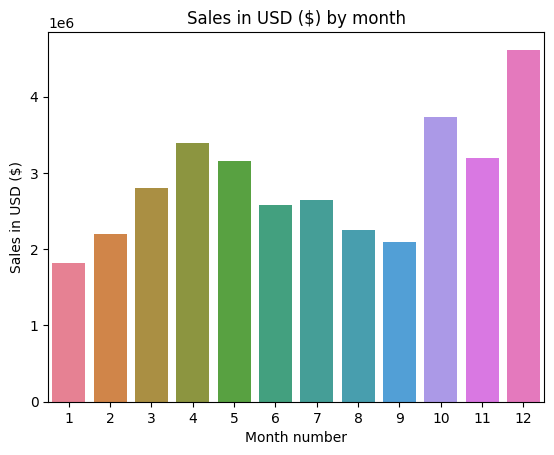

In [18]:
g=sns.barplot(data=month_group,x=month_group.index,y='Sales',palette='husl')
g.set_title("Sales in USD ($) by month")
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Question 2: What city sold the most product?

In [19]:
group_city = all_data.groupby(['City']).sum()
group_city

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-19-9e834ce2fe44>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_city = all_data.groupby(['City']).sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


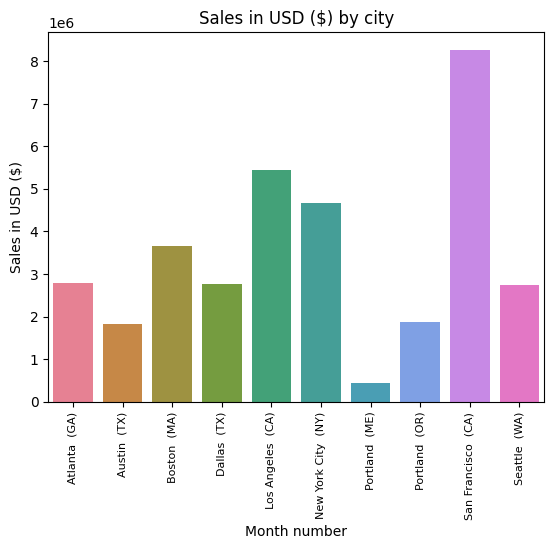

In [20]:
g=sns.barplot(data=group_city,x=group_city.index,y='Sales',palette='husl')
g.set_title("Sales in USD ($) by city")
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(rotation='vertical', size=8)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [21]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,Portland (ME),11.95,19,34,1
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,San Francisco (CA),1700.00,10,5,1
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,Los Angeles (CA),999.99,20,18,1
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,Seattle (WA),149.99,10,21,1
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,San Francisco (CA),99.99,18,58,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-22-545a18243b57>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in all_data.groupby(['Hour'])]


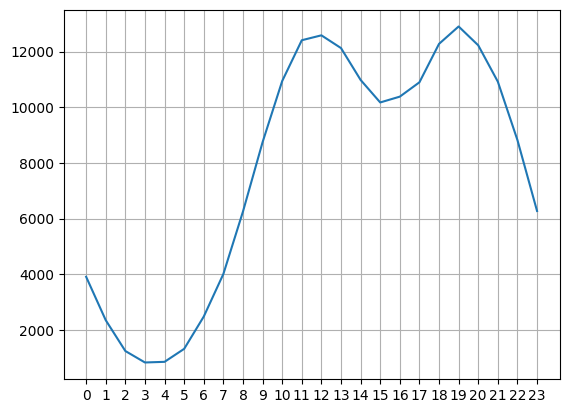

In [22]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

#### Question 4) What product sold the most? Why do you think it sold the most?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-23-32e8b228680c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()[['Quantity Ordered']]


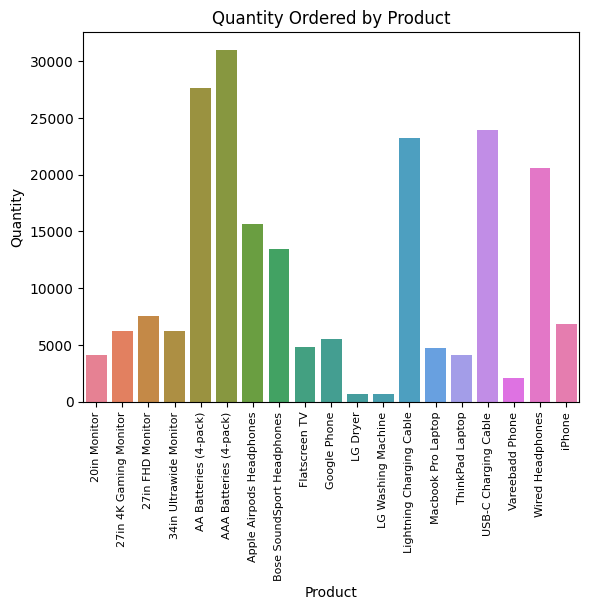

In [23]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()[['Quantity Ordered']]

g=sns.barplot(data=quantity_ordered,x=quantity_ordered.index,y='Quantity Ordered',palette='husl')
g.set_title("Quantity Ordered by Product")
plt.ylabel('Quantity')
plt.xlabel('Product')
plt.xticks(rotation='vertical', size=8)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-976119fb4a60>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()[['Price Each']]
<ipython-input-24-976119fb4a60>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  h=sns.lineplot(data=prices,x=prices.index,y='Price Each',palette='husl',ax=ax2,color='gray')


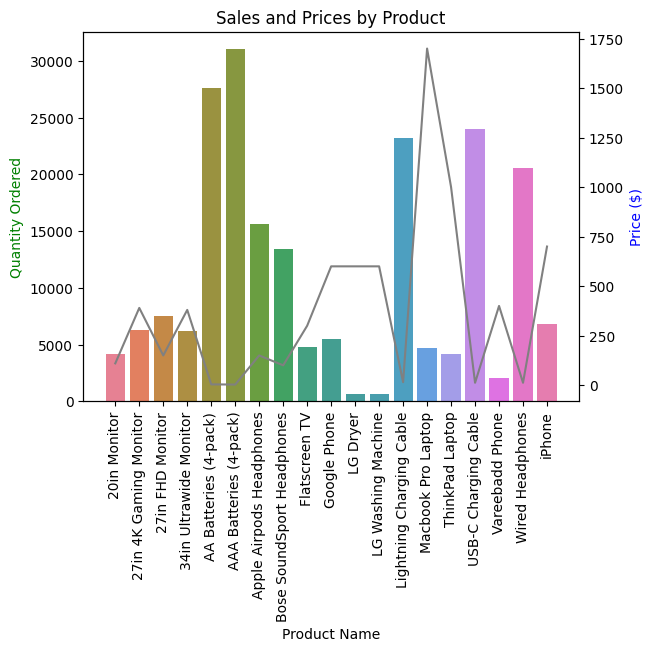

In [24]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()[['Price Each']]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
g=sns.barplot(data=quantity_ordered,x=quantity_ordered.index,y='Quantity Ordered',palette='husl',ax=ax1)
h=sns.lineplot(data=prices,x=prices.index,y='Price Each',palette='husl',ax=ax2,color='gray')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.title('Sales and Prices by Product')
plt.show()

### Market Basket Analysis
#### Use Cases
* Build Netflix-style recommendation engine
* Improve product recommendations on an e-commerce store
* Cross-sell products in a retail setting
* Improve inventory management
* Upsell products
#### What two products sold best together?

In [25]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-25-9004901cd214>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [26]:
df2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Grouped
17,209938,"iPhone,Wired Headphones"
29,209949,"Google Phone,USB-C Charging Cable"
41,209960,"USB-C Charging Cable,AA Batteries (4-pack)"
43,209961,"iPhone,Lightning Charging Cable"
147,210064,"Lightning Charging Cable,27in FHD Monitor"


In [27]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This list would help in order to offer the "partner product" when someone buy the other product of the pair
#### Quantity of products by Order ID

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1    171301
2      6778
3       340
4        17
5         1
Name: Product, dtype: int64

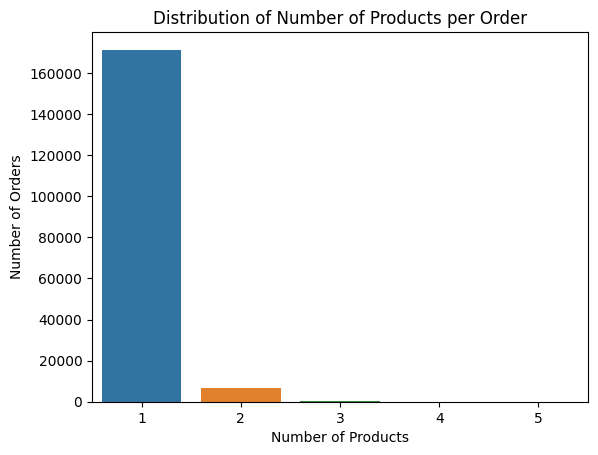

In [28]:
product_counts = all_data.groupby('Order ID')['Product'].count().value_counts()
display(product_counts)
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.xlabel('Number of Products')
plt.ylabel('Number of Orders')
plt.title('Distribution of Number of Products per Order')
plt.show()

**There was 6778 Orders of two products, 340 orders of 3 products, 17 orders of 4 products and 1 order of 1 product**
#### A priori algorithm - Frequent itemsets - Association rules

In [29]:
## Generate a comma separated column of products by id
df_agg = all_data.groupby('Order ID')['Product'].agg(lambda x: ','.join(x)).reset_index().drop('Order ID',axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# Generated a list of transactions and products
transactions = df_agg['Product'].apply(lambda t: t.split(',')).tolist()
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['iPhone'],
 ['Lightning Charging Cable'],
 ['Wired Headphones'],
 ['27in FHD Monitor'],
 ['Wired Headphones'],
 ['AAA Batteries (4-pack)'],
 ['27in 4K Gaming Monitor'],
 ['USB-C Charging Cable'],
 ['Bose SoundSport Headphones'],
 ['Apple Airpods Headphones'],
 ['Apple Airpods Headphones'],
 ['Macbook Pro Laptop'],
 ['AAA Batteries (4-pack)'],
 ['27in FHD Monitor'],
 ['Flatscreen TV'],
 ['27in FHD Monitor'],
 ['Vareebadd Phone'],
 ['Apple Airpods Headphones'],
 ['USB-C Charging Cable'],
 ['AA Batteries (4-pack)'],
 ['AAA Batteries (4-pack)'],
 ['USB-C Charging Cable'],
 ['Google Phone'],
 ['Apple Airpods Headphones'],
 ['AA Batteries (4-pack)'],
 ['AAA Batteries (4-pack)'],
 ['AAA Batteries (4-pack)'],
 ['USB-C Charging Cable'],
 ['AAA Batteries (4-pack)'],
 ['Bose SoundSport Headphones'],
 ['Apple Airpods Headphones'],
 ['Apple Airpods Headphones'],
 ['27in 4K Gaming Monitor'],
 ['Apple Airpods Headphones'],
 ['AA Batteries (4-pack)'],
 ['27in 4K Gaming Monitor'],
 ['Wired Headphones

In [31]:
products=all_data['Product'].unique().tolist()
products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['USB-C Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 '27in FHD Monitor',
 'Bose SoundSport Headphones',
 'Apple Airpods Headphones',
 'Lightning Charging Cable',
 'Wired Headphones',
 'Flatscreen TV',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 '34in Ultrawide Monitor',
 'iPhone',
 'Google Phone',
 '27in 4K Gaming Monitor',
 '20in Monitor',
 'LG Dryer',
 'Vareebadd Phone',
 'LG Washing Machine']

In [32]:
# using mlxtend package

# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178432,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
178433,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
178434,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
178435,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


#### Products ordered by Support values

In [33]:
support = onehot.mean()
print(support.sort_values(ascending=False))

USB-C Charging Cable          0.122480
Lightning Charging Cable      0.121074
AAA Batteries (4-pack)        0.115408
AA Batteries (4-pack)         0.115122
Wired Headphones              0.105623
Apple Airpods Headphones      0.087005
Bose SoundSport Headphones    0.074525
27in FHD Monitor              0.042020
iPhone                        0.038333
27in 4K Gaming Monitor        0.034886
34in Ultrawide Monitor        0.034600
Google Phone                  0.030946
Flatscreen TV                 0.026867
Macbook Pro Laptop            0.026458
ThinkPad Laptop               0.023123
20in Monitor                  0.022966
Vareebadd Phone               0.011573
LG Washing Machine            0.003732
LG Dryer                      0.003620
dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Frequent itemsets - pruning - Association rules

In [34]:
frequent_itemsets = apriori(onehot, min_support = 0.002, max_len = 3, use_colnames = True)
print(f'len of frequent itemsets: {len(frequent_itemsets)}')
print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


len of frequent itemsets: 25
     support                                 itemsets
0   0.022966                           (20in Monitor)
1   0.034886                 (27in 4K Gaming Monitor)
2   0.042020                       (27in FHD Monitor)
3   0.034600                 (34in Ultrawide Monitor)
4   0.115122                  (AA Batteries (4-pack))
5   0.115408                 (AAA Batteries (4-pack))
6   0.087005               (Apple Airpods Headphones)
7   0.074525             (Bose SoundSport Headphones)
8   0.026867                          (Flatscreen TV)
9   0.030946                           (Google Phone)
10  0.003620                               (LG Dryer)
11  0.003732                     (LG Washing Machine)
12  0.121074               (Lightning Charging Cable)
13  0.026458                     (Macbook Pro Laptop)
14  0.023123                        (ThinkPad Laptop)
15  0.122480                   (USB-C Charging Cable)
16  0.011573                        (Vareebadd Phone)

In [35]:
rules = association_rules(frequent_itemsets, metric = "support", min_threshold = 0.002)
print(f'The number of rules is {len(rules)}')
print('\n')
print('TABLE OF METRICS FOR RULES')
rules.sort_values('lift',ascending=False)

The number of rules is 12


TABLE OF METRICS FOR RULES


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Google Phone),(USB-C Charging Cable),0.030946,0.122480,0.005587,0.180551,1.474120,0.001797,1.070865,0.331900
3,(USB-C Charging Cable),(Google Phone),0.122480,0.030946,0.005587,0.045619,1.474120,0.001797,1.015374,0.366521
8,(Vareebadd Phone),(USB-C Charging Cable),0.011573,0.122480,0.002062,0.178208,1.454996,0.000645,1.067813,0.316374
9,(USB-C Charging Cable),(Vareebadd Phone),0.122480,0.011573,0.002062,0.016838,1.454996,0.000645,1.005356,0.356360
7,(iPhone),(Lightning Charging Cable),0.038333,0.121074,0.005666,0.147807,1.220804,0.001025,1.031370,0.188077
6,(Lightning Charging Cable),(iPhone),0.121074,0.038333,0.005666,0.046797,1.220804,0.001025,1.008880,0.205782
4,(Wired Headphones),(Google Phone),0.105623,0.030946,0.002365,0.022391,0.723534,-0.000904,0.991248,-0.299343
5,(Google Phone),(Wired Headphones),0.030946,0.105623,0.002365,0.076422,0.723534,-0.000904,0.968383,-0.282798
10,(Wired Headphones),(iPhone),0.105623,0.038333,0.002589,0.024513,0.639482,-0.001460,0.985833,-0.386632
11,(iPhone),(Wired Headphones),0.038333,0.105623,0.002589,0.067544,0.639482,-0.001460,0.959163,-0.369577


Conclusions
The top-selling products are charging cables, wired headphones and between more expensive products we can mention 27 in Monitor and iphone
The most profitable customers are in San Francisco
Sales trends show a peak in Octuber, November and above all December, with a decline in january-february and june-july. The best selling hours are at 12 and sunset.
Market basket analysis has identified several product associations, such as ('iPhone', 'Lightning Charging Cable'), ('Google Phone', 'USB-C Charging Cable') if we taking in account the number of times the combination appears. If we taking in account association rules and "lift" metric "(Google Phone)-(USB-C Charging Cable)" is the combination that have the best metric and "(Vareebadd Phone)-(USB-C Charging Cable)" is coming close second. This opens opportunity for offering the associate product and even evaluate adding a discount to it.